In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.stattools as stattools
import math

In [3]:
df = pd.read_csv("../prices.txt", sep='\s+', header=None, index_col=None)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,13.845620,69.033740,47.262580,48.004780,55.496120,11.740700,18.177200,46.78280,68.537300,50.185100,...,31.651400,63.251640,12.502360,60.843540,36.523580,52.461460,57.537160,34.427360,41.273040,56.123620
std,0.748745,3.908187,0.614438,2.051494,1.733916,0.635884,0.299771,1.26656,0.585843,3.207362,...,0.771223,7.833634,0.940225,1.898022,1.561982,0.756214,4.548284,0.878169,3.814908,1.178059
min,12.630000,62.470000,46.330000,44.900000,51.660000,10.020000,17.650000,44.01000,67.260000,45.260000,...,30.270000,50.620000,10.630000,56.260000,31.760000,50.210000,49.200000,32.800000,31.640000,53.470000
25%,13.207500,65.517500,46.820000,45.750000,54.000000,11.480000,17.970000,45.91750,68.110000,47.597500,...,30.950000,55.865000,11.817500,59.420000,35.837500,52.050000,54.062500,33.800000,39.615000,55.317500
50%,13.590000,68.255000,46.975000,47.830000,55.880000,11.850000,18.100000,46.69000,68.550000,49.535000,...,31.590000,64.615000,12.210000,60.750000,36.825000,52.375000,55.425000,34.350000,41.665000,56.100000
75%,14.582500,72.915000,47.800000,50.380000,56.720000,12.210000,18.410000,47.50250,68.912500,52.192500,...,32.302500,70.352500,13.232500,62.107500,37.602500,52.892500,61.855000,35.032500,43.525000,57.002500
max,15.560000,75.150000,48.610000,51.010000,59.120000,13.000000,18.980000,51.09000,69.990000,59.100000,...,33.260000,77.470000,14.500000,66.090000,39.130000,54.150000,66.600000,36.480000,50.020000,59.310000


In [4]:
matrix = df.corr()
matrix

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,0.484861,-0.000323,0.342298,0.317748,0.310771,0.066857,0.158233,-0.552252,-0.447394,...,0.315695,-0.388165,0.010505,-0.590003,0.020916,0.489821,-0.547067,-0.596600,0.222497,-0.247700
1,0.484861,1.000000,0.711375,0.887782,-0.248500,0.312233,0.479015,0.063246,-0.325255,-0.511915,...,0.794773,-0.859488,0.708851,-0.347945,0.206459,0.618185,-0.739845,0.094219,0.225338,-0.140404
2,-0.000323,0.711375,1.000000,0.886664,-0.303549,0.468646,0.702281,-0.148973,-0.029862,-0.521895,...,0.816023,-0.836914,0.946771,-0.102320,0.572893,0.509319,-0.705855,0.658741,0.530097,0.170426
3,0.342298,0.887782,0.886664,1.000000,-0.161168,0.508628,0.741260,-0.053210,-0.287254,-0.636161,...,0.920745,-0.954218,0.902854,-0.331218,0.448414,0.680553,-0.873891,0.286249,0.554721,0.038340
4,0.317748,-0.248500,-0.303549,-0.161168,1.000000,0.421530,-0.176451,-0.298372,-0.146141,-0.374560,...,-0.158876,0.039312,-0.275589,-0.195832,0.308917,0.327946,-0.028159,-0.436382,0.309562,0.446233
5,0.310771,0.312233,0.468646,0.508628,0.421530,1.000000,0.511504,-0.131503,-0.082759,-0.618745,...,0.464680,-0.511109,0.508297,-0.488032,0.751183,0.398783,-0.705058,0.111846,0.807994,0.389717
6,0.066857,0.479015,0.702281,0.741260,-0.176451,0.511504,1.000000,0.150450,-0.182146,-0.505333,...,0.707649,-0.621149,0.778895,-0.300456,0.411076,0.375337,-0.776602,0.322419,0.745261,0.047916
7,0.158233,0.063246,-0.148973,-0.053210,-0.298372,-0.131503,0.150450,1.000000,-0.082670,0.179650,...,0.045617,0.176603,-0.109471,-0.100130,-0.392406,-0.288954,-0.074789,-0.221890,-0.059946,-0.427736
8,-0.552252,-0.325255,-0.029862,-0.287254,-0.146141,-0.082759,-0.182146,-0.082670,1.000000,0.386474,...,-0.174994,0.330652,-0.120568,0.378888,-0.011695,-0.529997,0.437705,0.450856,-0.092568,0.399622
9,-0.447394,-0.511915,-0.521895,-0.636161,-0.374560,-0.618745,-0.505333,0.179650,0.386474,1.000000,...,-0.481375,0.673675,-0.516890,0.396621,-0.633246,-0.780793,0.705582,-0.063679,-0.567770,-0.189539


In [5]:
# Get the cointegration matrix of p-value
coint_matrix = [[0] * 50 for i in range(50)]
for i in range(50):
    for j in range(50):
        if i == j:
            coint_matrix[i][j] = 0
            continue
        coint_matrix[i][j] = stattools.coint(df[i], df[j])[1]

coint_matrix

[[0,
  0.651747250906717,
  0.8358541101582433,
  0.7436061070335255,
  0.7762466563100267,
  0.6884043775600203,
  0.8193540563695718,
  0.7873285315978347,
  0.5140618576124736,
  0.6866830242964443,
  0.7010309413768767,
  0.8512950723181247,
  0.7864903391102989,
  0.6403258373166987,
  0.848004853784186,
  0.8800212093096389,
  0.8437838360135013,
  0.8412888734199482,
  0.7112832625313186,
  0.45060157285891145,
  0.828588073172811,
  0.8174761836529001,
  0.8138799251136635,
  0.8520022767487134,
  0.8860912045543522,
  0.6492445208092088,
  0.8244453910220035,
  0.7910467747289118,
  0.6172543729682246,
  0.5498056155844929,
  0.32050221875777435,
  0.8188122691823381,
  0.8151475044206749,
  0.8572762890289152,
  0.7947013183295086,
  0.8047037820547691,
  0.7700035835642066,
  0.8363228505745549,
  0.7555048489873992,
  0.8678305959663328,
  0.814536739278956,
  0.7878993203460027,
  0.8331890052635958,
  0.07495240884295636,
  0.8319538097251842,
  0.7142279835112928,
  0.45

In [22]:
print(coint_matrix[5][38])
print(coint_matrix[38][5])

0.015620796842430352
0.043980113353111645


In [7]:
# Group the stocks with high cointegration together (Bad union-find, no size :D)
link = [i for i in range(50)] 
print(link)
def find(x):
    if (x == link[x]):
        return x
    link[x] = find(link[x])
    return link[x]

def merge(x, y):
    repX = find(x)
    repY = find(y)
    link[repY] = repX

groups = []
for i in range(50):
    minVal = 5
    minIndex = -1
    for j in range(50):
        if j == i:
            continue
        # Get the p-value
        val = coint_matrix[i][j]
        if val < minVal:
            minVal = val
            minIndex = j
    if minVal < 0.05:
        merge(i, minIndex)
    


# Get the representative from each group
reps = []
groups = {}
for i in range(len(link)):
    if link[i] == i:
        reps.append(i)
    
    repCur = find(i)
    if repCur not in groups:
        groups[repCur] = set()
    groups[repCur].add(i)
    


print(groups)
print(reps)
print(len(reps))
    

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
{43: {0, 43}, 1: {1, 10}, 2: {2, 11, 42}, 25: {25, 3}, 4: {4}, 5: {5, 38}, 31: {40, 12, 6, 31}, 7: {49, 7}, 8: {8, 46, 29, 30}, 9: {9, 13}, 14: {18, 27, 36, 14}, 15: {15}, 16: {16}, 17: {17}, 19: {19}, 20: {34, 20}, 21: {21}, 22: {24, 22}, 23: {23}, 26: {26}, 28: {28, 39}, 32: {32}, 33: {33}, 35: {35}, 37: {37}, 41: {41}, 44: {44}, 45: {45}, 47: {47}, 48: {48}}
[1, 2, 4, 5, 7, 8, 9, 14, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 28, 31, 32, 33, 35, 37, 41, 43, 44, 45, 47, 48]
30


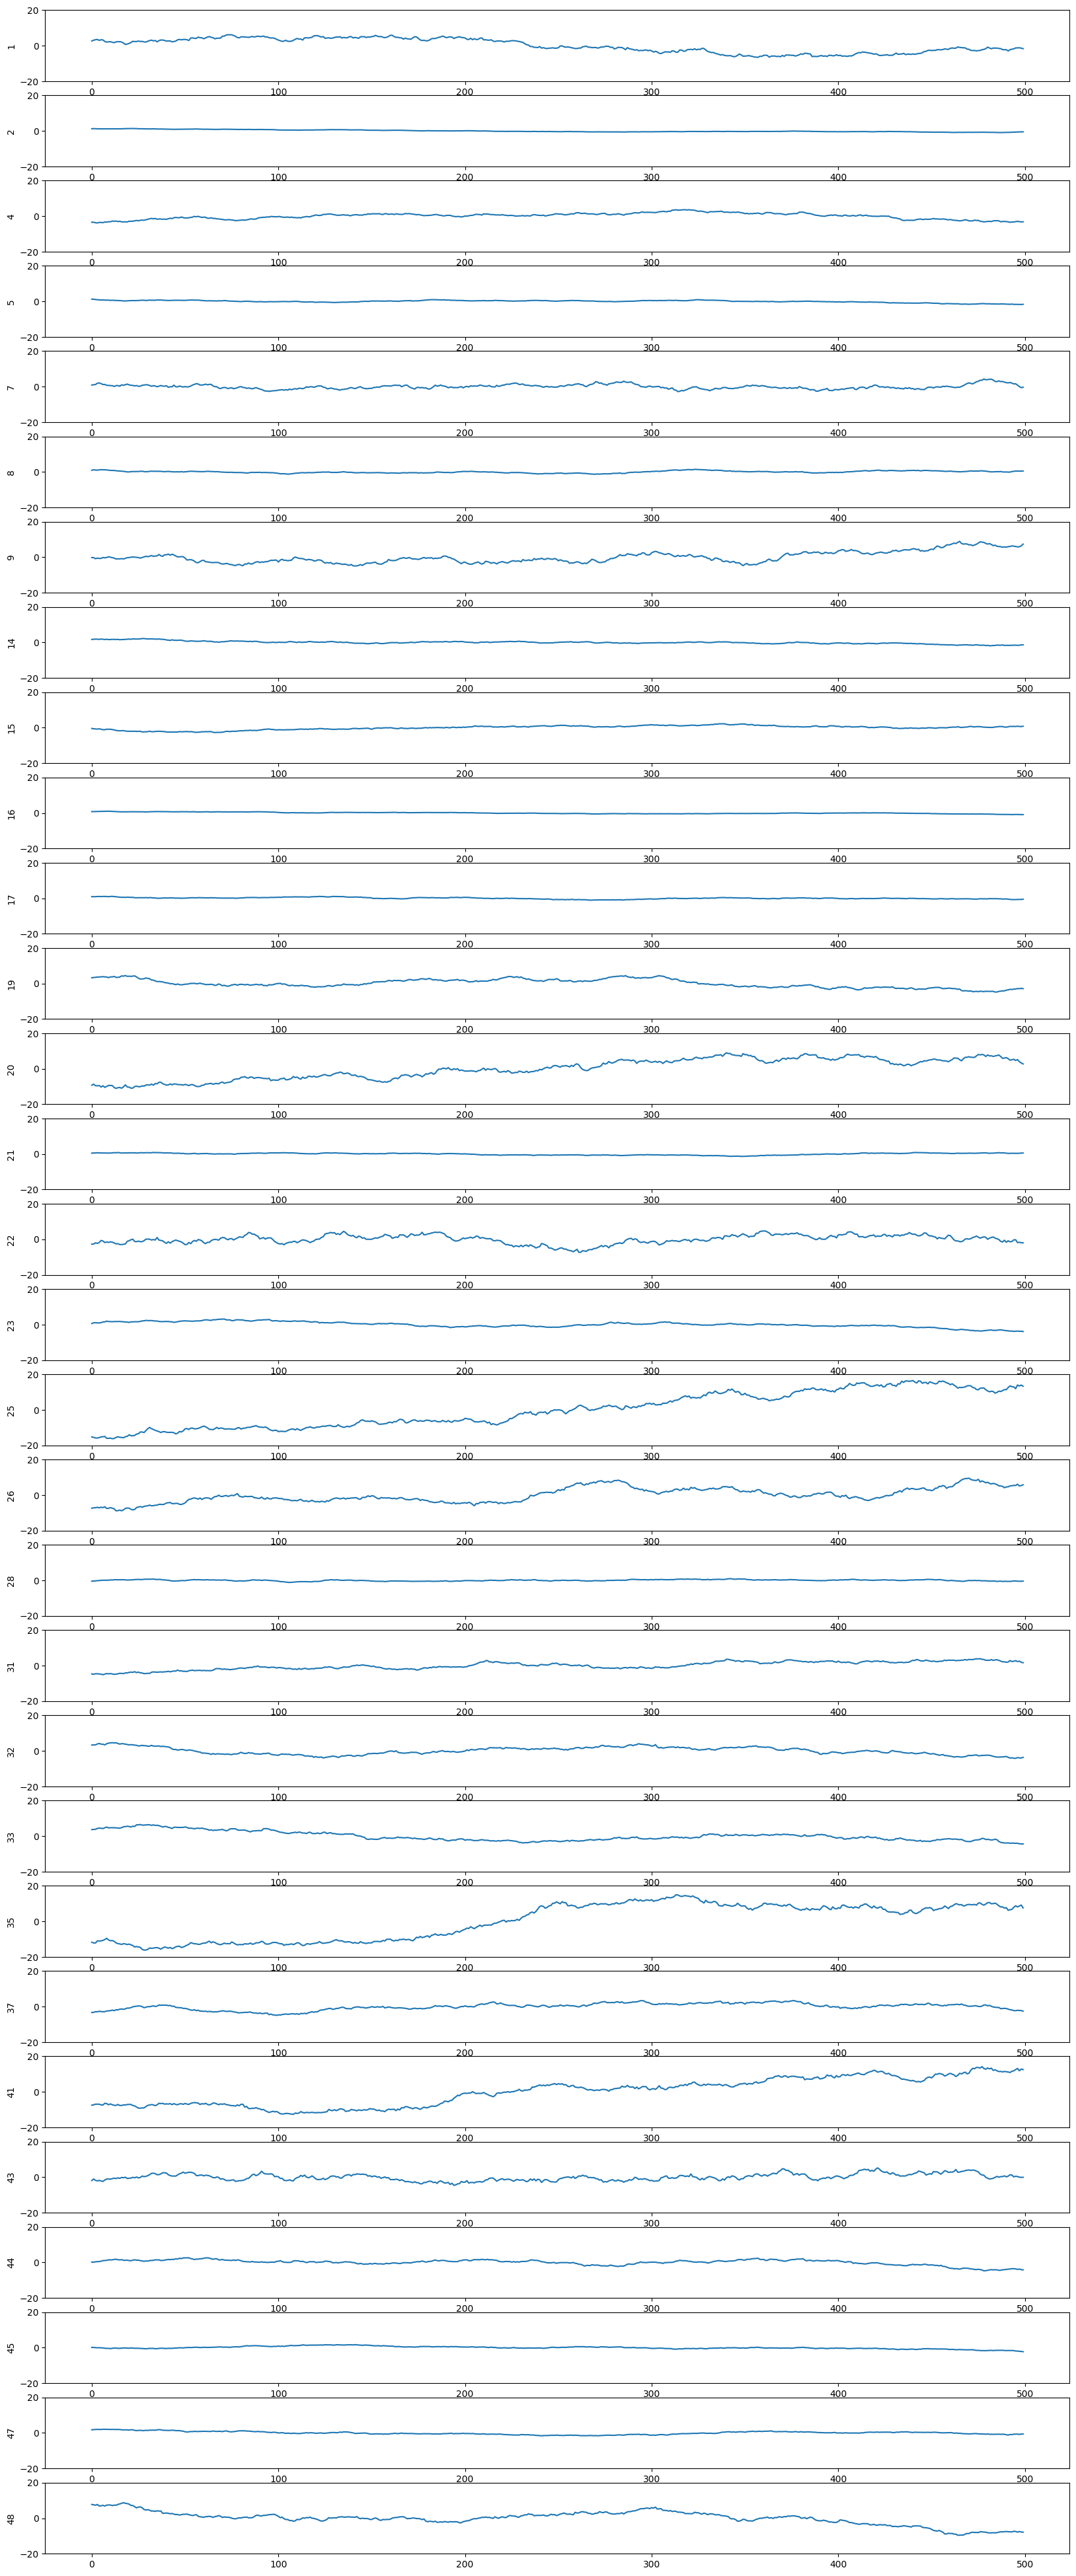

In [8]:
fig, axs = plt.subplots(len(reps), 1, figsize=(20, 50))

for i in range(len(reps)):
    sns.lineplot(df[reps[i]] - df[reps[i]].mean(), ax=axs[i])
    axs[i].set_ylim(-20, 20)

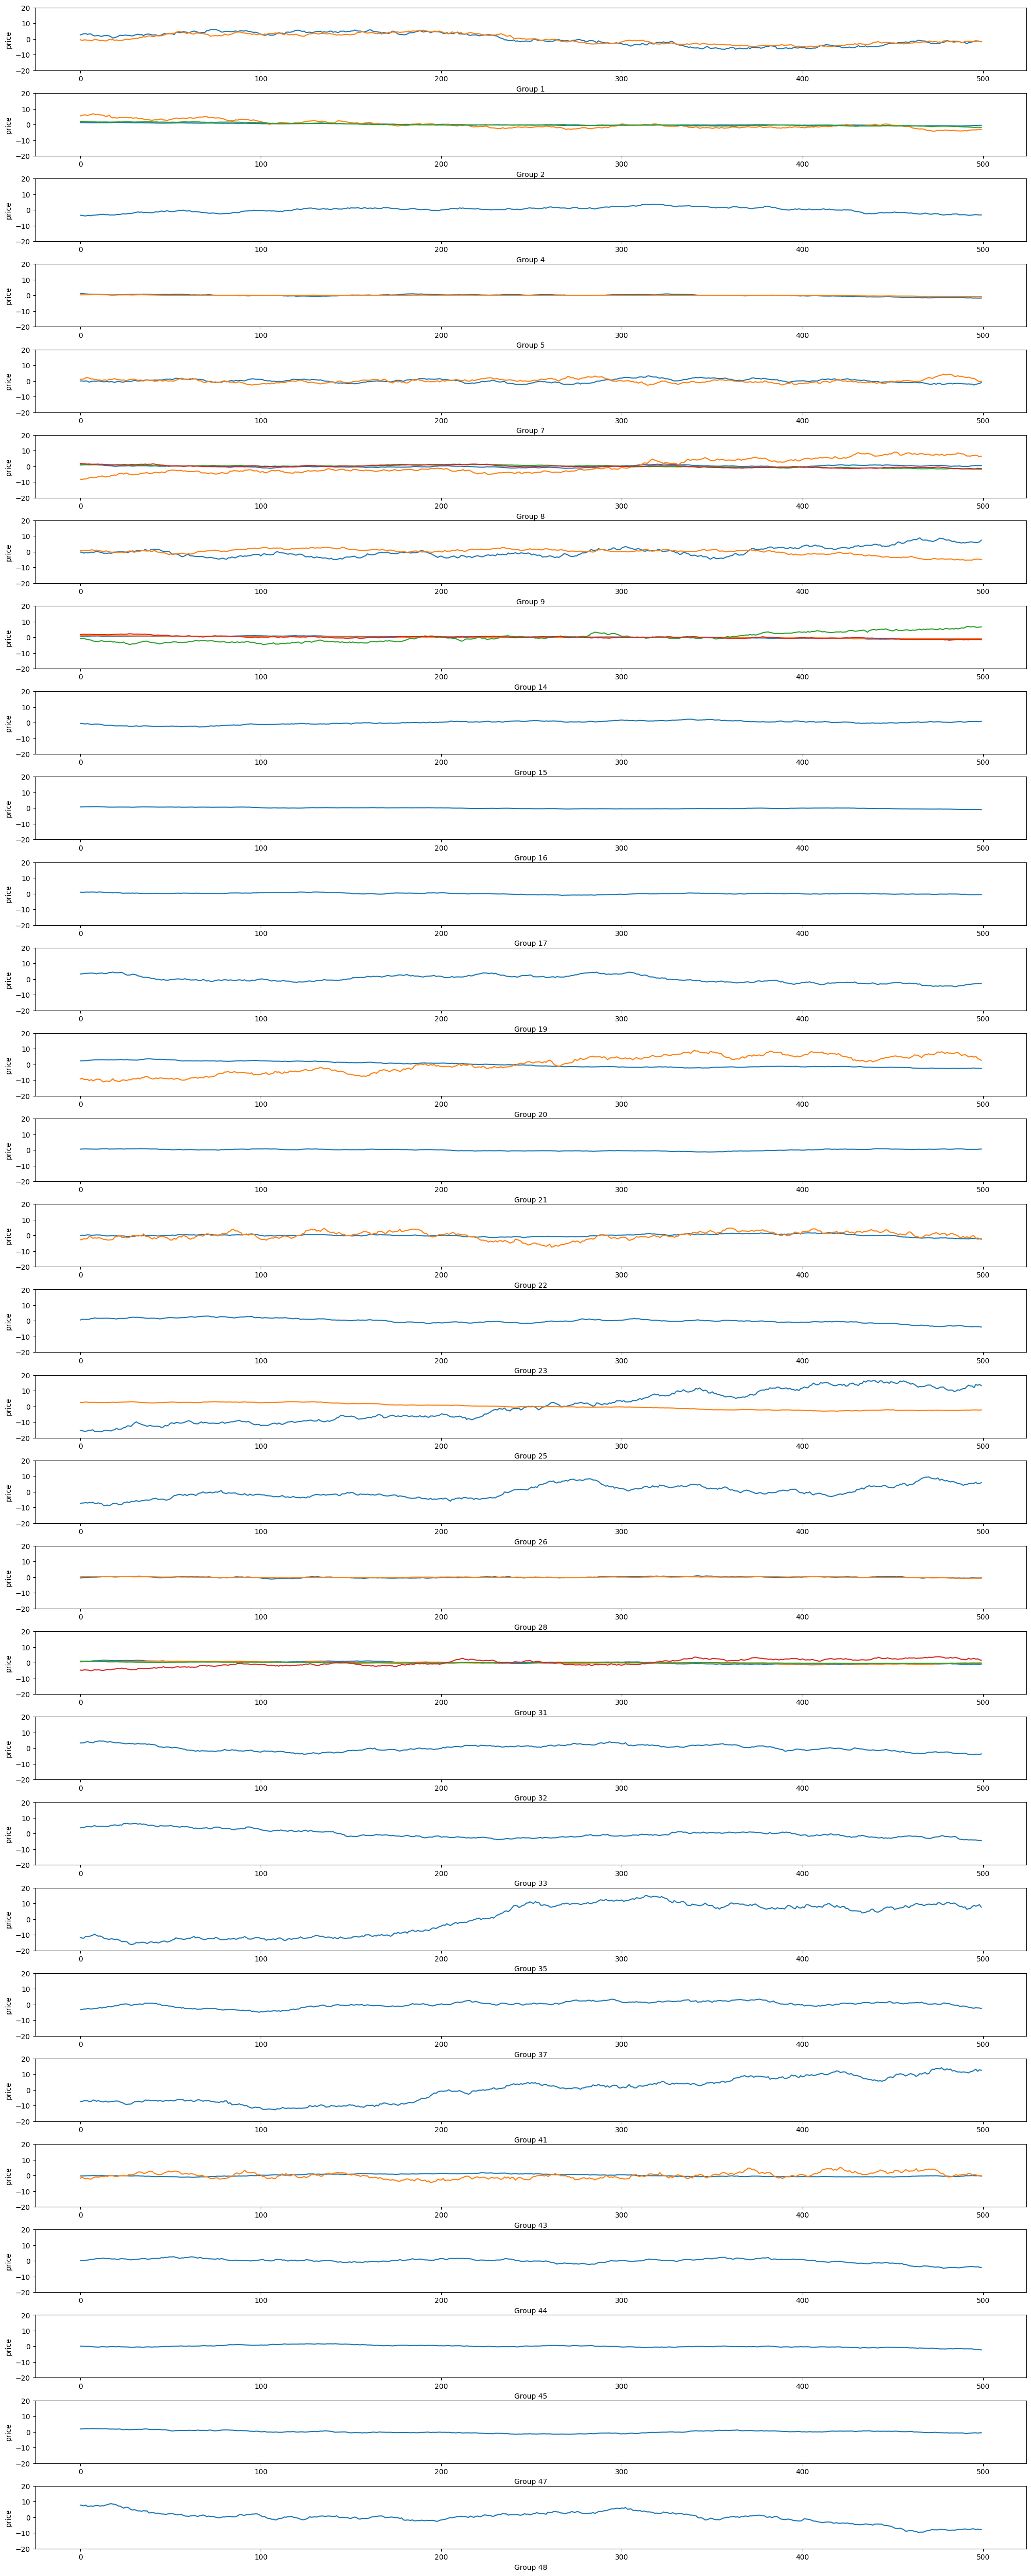

In [9]:
# Check the group rep
fig, axs = plt.subplots(len(reps), 1, figsize=(20, 50))
fig.tight_layout()

for i in range(len(reps)):
    for elem in groups[reps[i]]:
        sns.lineplot(df[elem] - df[elem].mean(), ax=axs[i])
    axs[i].set_ylim(-20, 20)
    axs[i].set(xlabel=f"Group {reps[i]}", ylabel="price")
    

In [25]:
for i in range(50):
    print(i, ": ", end="")
    for j in range(50):
        if coint_matrix[i][j] < 0.05 and coint_matrix[j][i] < 0.05:
            print(j, end=", ")
    print()


0 : 0, 
1 : 1, 10, 
2 : 2, 11, 
3 : 3, 
4 : 4, 
5 : 5, 38, 
6 : 6, 
7 : 7, 28, 43, 49, 
8 : 8, 
9 : 9, 13, 
10 : 1, 10, 
11 : 2, 11, 42, 
12 : 12, 20, 40, 
13 : 9, 13, 
14 : 14, 
15 : 15, 
16 : 16, 
17 : 17, 
18 : 18, 36, 
19 : 19, 
20 : 12, 20, 34, 40, 
21 : 21, 
22 : 22, 
23 : 23, 
24 : 24, 
25 : 25, 
26 : 26, 
27 : 27, 
28 : 7, 28, 
29 : 29, 30, 
30 : 29, 30, 
31 : 31, 40, 
32 : 32, 
33 : 33, 
34 : 20, 34, 
35 : 35, 
36 : 18, 36, 
37 : 37, 
38 : 5, 38, 
39 : 39, 
40 : 12, 20, 31, 40, 
41 : 41, 
42 : 11, 42, 
43 : 7, 43, 49, 
44 : 44, 
45 : 45, 
46 : 46, 
47 : 47, 
48 : 48, 
49 : 7, 43, 49, 


In [48]:
a = 42
b = 11
print(coint_matrix[a][b], coint_matrix[b][a])

0.04246140796956078 0.010955584287567294


<Axes: ylabel='42'>

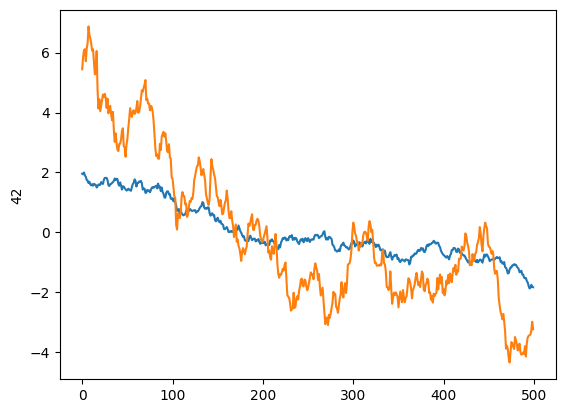

In [49]:
sns.lineplot(df[a] - df[a].mean())
sns.lineplot(df[b] - df[b].mean())

<Axes: >

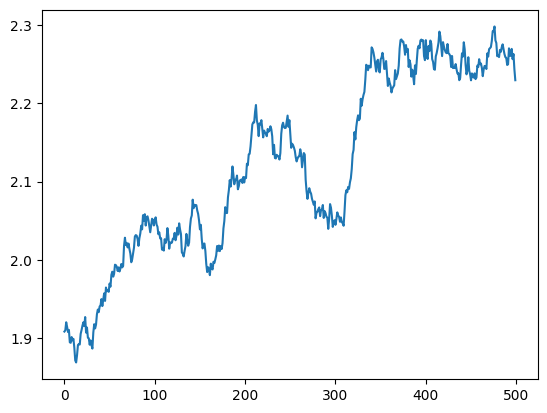

In [42]:
sns.lineplot((df[a]) / (df[b]))

<Axes: ylabel='7'>

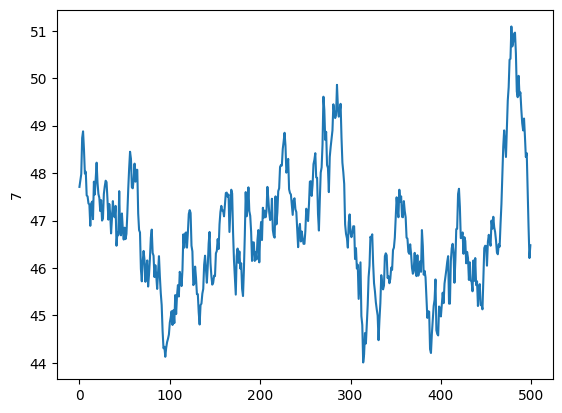

In [50]:
sns.lineplot(df[7])